In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error


In [4]:
np.random.seed(42)

X = np.sort(5 * np.random.rand(120, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.normal(0, 0.3, size=y.shape)#addinf noise to the dataset


In [5]:
#train validations
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)



In [6]:
#underfitting model(high bias)
underfit_model = Pipeline([
    ("poly", PolynomialFeatures(degree=1)),
    ("lr", LinearRegression())
])

underfit_model.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('lr', LinearRegression())])

In [7]:
#over fitting model(high variance)
overfit_model = Pipeline([
    ("poly", PolynomialFeatures(degree=15)),
    ("lr", LinearRegression())
])

overfit_model.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=15)),
                ('lr', LinearRegression())])

In [8]:
#optimal fit model
optimal_model = Pipeline([
    ("poly", PolynomialFeatures(degree=5)),
    ("lr", LinearRegression())
])

optimal_model.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('lr', LinearRegression())])

In [9]:
#error comparison function
def evaluate_model(model):
    train_error = mean_squared_error(y_train, model.predict(X_train))
    val_error = mean_squared_error(y_val, model.predict(X_val))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    return train_error, val_error, test_error

print("Underfit:", evaluate_model(underfit_model))
print("Overfit:", evaluate_model(overfit_model))
print("Optimal:", evaluate_model(optimal_model))


Underfit: (0.23156193414692655, 0.3348047854938101, 0.3206232782313177)
Overfit: (0.06450298913763816, 0.10794719258168704, 0.1121303501086904)
Optimal: (0.06992480480381565, 0.10456047486812577, 0.09039882609846561)


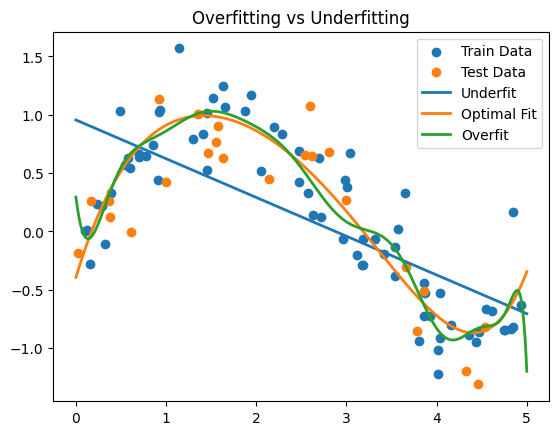

In [10]:
#visualization
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)

plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")

plt.plot(X_plot, underfit_model.predict(X_plot), label="Underfit", linewidth=2)
plt.plot(X_plot, optimal_model.predict(X_plot), label="Optimal Fit", linewidth=2)
plt.plot(X_plot, overfit_model.predict(X_plot), label="Overfit", linewidth=2)

plt.legend()
plt.title("Overfitting vs Underfitting")
plt.show()


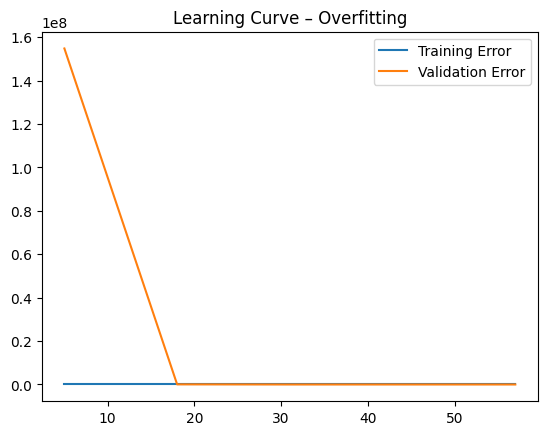

In [11]:
#learning curve
train_sizes, train_scores, val_scores = learning_curve(
    overfit_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
plt.plot(train_sizes, -val_scores.mean(axis=1), label="Validation Error")
plt.legend()
plt.title("Learning Curve – Overfitting")
plt.show()


In [12]:
#using regulaization correct overfitted model
ridge_model = Pipeline([
    ("poly", PolynomialFeatures(degree=15)),
    ("ridge", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
print("Ridge:", evaluate_model(ridge_model))


Ridge: (0.07160276318546985, 0.12672765615705908, 0.10104718392901386)


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.98315e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [13]:
#cross validation
cv_score = cross_val_score(
    ridge_model, X_train, y_train,
    scoring="neg_mean_squared_error", cv=5
)

print("CV MSE:", -cv_score.mean())


CV MSE: 0.2770163670442854


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.88524e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.51111e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.34274e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.42082e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.72995e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


This project clearly demonstrates how increasing model complexity reduces training error but increases generalization error. Regularization and cross-validation effectively control overfitting, leading to robust models.